# Behavioural Economics Experiment

In this notebook, we performed all the statistical analysis and data visualization for the experiment conducted during the course [Behavioural Economics](https://coursecatalogue.uva.nl/xmlpages/page/2018-2019-en/search-course/course/58872) (6012B0265Y) at the [University of Amsterdam](https://www.uva.nl/en/home).


## Introduction

As part of an assignment for the course we were instructed to perform a behavioural economics experiment for the class (using the rest of the students are subjects).

For our experiment, we recreated Nagel's (1995) experiment, but added a treatment group where participants were grouped in groups of three and participated as a single individual competing in a market with 5 other groups of three. At the begining of the each round/stage we asked all the members of a group to log their individual response before discussing with the rest of the group about their final response.


## Data

The data contains the data for each subject that participated in the experiment




**References**

Nagel, R. (1995). Unraveling in guessing games: An experimental study. The American Economic Review, 85(5), 1313-1326.


<div style="margin-top: 100px;"></div>

## Python Libraries Imports

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

# Statistical tests
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest

# Style globals
style.use('seaborn-pastel')
colors = ["#E4CA99", "#A1B6B4", "#AEDDE0", "#A63D11", "#E97140", "#2D7F9D", "#DC7684", "#A4C9D7", "#EAF2F4"]

# Jupyter configuration
%matplotlib inline

<div style="margin-top: 100px;"></div>

## Import Data


In [2]:
df = pd.read_csv("DataSubjects.csv")

In [3]:
df.head()

,ID,Individual Code,Seat,Treatment,Market,Gender,Number of Answers,Answers Missing,Individual Answer Stage 1,Individual Answer Stage 2,...,Time Individual Stage 1,Time Individual Stage 2,Time Individual Stage 3,Time Individual Stage 4,Time Group Stage 1,Time Group Stage 2,Time Group Stage 3,Time Group Stage 4,Experience,Skills
0,1806G,18,6,G,2,Female,4,False,12.07,19.3,...,11/6/2019 16:07:43,11/6/2019 16:22:40,11/6/2019 16:35:10,11/6/2019 16:45:53,11/6/2019 16:07:43,11/6/2019 16:22:40,11/6/2019 16:35:10,11/6/2019 16:45:53,Yes,3.0
1,1706G,17,6,G,2,Female,4,False,37.50,68.0,...,11/6/2019 16:07:44,11/6/2019 16:22:41,11/6/2019 16:35:10,11/6/2019 16:45:58,11/6/2019 16:07:44,11/6/2019 16:22:41,11/6/2019 16:35:10,11/6/2019 16:45:58,Yes,2.0
2,1606G,16,6,G,2,Male,4,False,43.00,26.0,...,11/6/2019 16:07:45,11/6/2019 16:22:42,11/6/2019 16:35:10,11/6/2019 16:45:45,11/6/2019 16:07:45,11/6/2019 16:22:42,11/6/2019 16:35:10,11/6/2019 16:45:45,No,3.0
3,5117G,51,17,G,4,Female,4,False,29.00,16.0,...,11/6/2019 16:08:29,11/6/2019 16:23:35,11/6/2019 16:37:20,11/6/2019 16:45:01,11/6/2019 16:08:29,11/6/2019 16:23:35,11/6/2019 16:37:20,11/6/2019 16:45:01,Yes,2.0
4,4917G,49,17,G,4,Male,4,False,17.00,3.0,...,11/6/2019 16:08:30,11/6/2019 16:23:34,11/6/2019 16:37:18,11/6/2019 16:44:45,11/6/2019 16:08:30,11/6/2019 16:23:34,11/6/2019 16:37:18,11/6/2019 16:44:45,Yes,4.0


In [4]:
df.count()

ID                           80
Individual Code              80
Seat                         80
Treatment                    80
Market                       80
Gender                       80
Number of Answers            80
Answers Missing              80
Individual Answer Stage 1    80
Individual Answer Stage 2    80
Individual Answer Stage 3    80
Individual Answer Stage 4    80
Group Answer Stage 1         60
Group Answer Stage 2         60
Group Answer Stage 3         60
Group Answer Stage 4         60
Final Answer Stage 1         80
Final Answer Stage 2         80
Final Answer Stage 3         80
Final Answer Stage 4         80
Time Individual Stage 1      80
Time Individual Stage 2      80
Time Individual Stage 3      80
Time Individual Stage 4      80
Time Group Stage 1           80
Time Group Stage 2           80
Time Group Stage 3           80
Time Group Stage 4           80
Experience                   66
Skills                       66
dtype: int64

In [5]:
df.dtypes

ID                            object
Individual Code                int64
Seat                           int64
Treatment                     object
Market                         int64
Gender                        object
Number of Answers              int64
Answers Missing                 bool
Individual Answer Stage 1    float64
Individual Answer Stage 2    float64
Individual Answer Stage 3    float64
Individual Answer Stage 4     object
Group Answer Stage 1         float64
Group Answer Stage 2         float64
Group Answer Stage 3         float64
Group Answer Stage 4          object
Final Answer Stage 1         float64
Final Answer Stage 2         float64
Final Answer Stage 3         float64
Final Answer Stage 4          object
Time Individual Stage 1       object
Time Individual Stage 2       object
Time Individual Stage 3       object
Time Individual Stage 4       object
Time Group Stage 1            object
Time Group Stage 2            object
Time Group Stage 3            object
T

In [6]:
df.describe()

,Individual Code,Seat,Market,Number of Answers,Individual Answer Stage 1,Individual Answer Stage 2,Individual Answer Stage 3,Group Answer Stage 1,Group Answer Stage 2,Group Answer Stage 3,Final Answer Stage 1,Final Answer Stage 2,Final Answer Stage 3,Skills
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,60.000000,60.000000,60.000000,80.000000,80.000000,80.000000,66.000000
mean,40.5000,10.500000,2.500000,3.825000,36.126765,15.340342,7.669050,24.580000,7.407500,1.069500,28.755788,11.240625,4.539800,2.500000
std,23.2379,5.802662,1.125088,0.382364,23.635821,17.060620,19.154481,21.226158,8.107879,1.288075,23.001638,12.393299,11.857805,0.808608
min,1.0000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.7500,5.750000,1.750000,4.000000,21.585000,4.300000,0.000000,17.150000,2.250000,0.000000,18.750000,3.525000,0.000000,2.000000
50%,40.5000,10.500000,2.500000,4.000000,33.331500,10.000000,1.000000,21.150000,5.000000,0.665000,22.200000,6.500000,0.800000,3.000000
75%,60.2500,15.250000,3.250000,4.000000,43.360000,20.000000,4.962500,27.750000,9.812500,2.050000,35.250000,18.000000,3.200000,3.000000
max,80.0000,20.000000,4.000000,4.000000,100.000000,100.000000,100.000000,100.000000,29.000000,4.330000,100.000000,50.000000,82.000000,4.000000


<div style="margin-top: 100px;"></div>

## Data Wrangling

In [7]:
df.dtypes

ID                            object
Individual Code                int64
Seat                           int64
Treatment                     object
Market                         int64
Gender                        object
Number of Answers              int64
Answers Missing                 bool
Individual Answer Stage 1    float64
Individual Answer Stage 2    float64
Individual Answer Stage 3    float64
Individual Answer Stage 4     object
Group Answer Stage 1         float64
Group Answer Stage 2         float64
Group Answer Stage 3         float64
Group Answer Stage 4          object
Final Answer Stage 1         float64
Final Answer Stage 2         float64
Final Answer Stage 3         float64
Final Answer Stage 4          object
Time Individual Stage 1       object
Time Individual Stage 2       object
Time Individual Stage 3       object
Time Individual Stage 4       object
Time Group Stage 1            object
Time Group Stage 2            object
Time Group Stage 3            object
T

We need to make the following type adjustments

**To Float**
- Individual Answer Stage 4
- Group Answer Stage 4

**To DateTime**
- Time Individual Stage 1
- Time Individual Stage 2
- Time Individual Stage 3
- Time Individual Stage 4
- Time Group Stage 1
- Time Group Stage 2
- Time Group Stage 3
- Time Group Stage 4

**To Bool**
- Experience

But first, we will change the name of some columns for convenience

In [8]:
df.rename(
    columns={
        "Time Individual Stage 1": "time_ind_stage1",
        "Time Individual Stage 2": "time_ind_stage2",
        "Time Individual Stage 3": "time_ind_stage3",
        "Time Individual Stage 4": "time_ind_stage4",
        "Time Group Stage 1": "time_group_stage1",
        "Time Group Stage 2": "time_group_stage2",
        "Time Group Stage 3": "time_group_stage3",
        "Time Group Stage 4": "time_group_stage4",
    },
    inplace=True
)

In [9]:
df.columns

Index(['ID', 'Individual Code', 'Seat', 'Treatment', 'Market', 'Gender',
       'Number of Answers', 'Answers Missing', 'Individual Answer Stage 1',
       'Individual Answer Stage 2', 'Individual Answer Stage 3',
       'Individual Answer Stage 4', 'Group Answer Stage 1',
       'Group Answer Stage 2', 'Group Answer Stage 3', 'Group Answer Stage 4',
       'Final Answer Stage 1', 'Final Answer Stage 2', 'Final Answer Stage 3',
       'Final Answer Stage 4', 'time_ind_stage1', 'time_ind_stage2',
       'time_ind_stage3', 'time_ind_stage4', 'time_group_stage1',
       'time_group_stage2', 'time_group_stage3', 'time_group_stage4',
       'Experience', 'Skills'],
      dtype='object')

**Parsing Floats**

In [10]:
df.loc[df["Individual Answer Stage 4"] == "-", "Individual Answer Stage 4"] = np.nan
df['Individual Answer Stage 4'] = pd.to_numeric(df['Individual Answer Stage 4'],errors='coerce')

df.loc[df["Group Answer Stage 4"] == "-", "Group Answer Stage 4"] = np.nan
df['Group Answer Stage 4'] = pd.to_numeric(df['Group Answer Stage 4'],errors='coerce')

df.loc[df["Final Answer Stage 4"] == "-", "Final Answer Stage 4"] = np.nan
df['Final Answer Stage 4'] = pd.to_numeric(df['Final Answer Stage 4'],errors='coerce')

**Parsing Dates**

In [11]:
df["time_ind_stage1"] = pd.to_datetime(df["time_ind_stage1"])
df["time_ind_stage2"] = pd.to_datetime(df["time_ind_stage2"])
df["time_ind_stage3"] = pd.to_datetime(df["time_ind_stage3"])

df.loc[df["time_ind_stage4"] == "-", "time_ind_stage4"] = np.nan
df["time_ind_stage4"] = pd.to_datetime(df["time_ind_stage4"])

df["time_group_stage1"] = pd.to_datetime(df["time_group_stage1"])
df["time_group_stage2"] = pd.to_datetime(df["time_group_stage2"])
df["time_group_stage3"] = pd.to_datetime(df["time_group_stage3"])

df.loc[df["time_group_stage4"] == "-", "time_group_stage4"] = np.nan
df["time_group_stage4"] = pd.to_datetime(df["time_group_stage4"])

**Parsing Booleans**

In [12]:
df["Experience"].unique()

array(['Yes', 'No', nan], dtype=object)

In [13]:
df["experience"] = np.nan
df.loc[df["Experience"] == "Yes", "experience"] = True
df.loc[df["Experience"] == "No", "experience"] = False

In [14]:
df.dtypes

ID                                   object
Individual Code                       int64
Seat                                  int64
Treatment                            object
Market                                int64
Gender                               object
Number of Answers                     int64
Answers Missing                        bool
Individual Answer Stage 1           float64
Individual Answer Stage 2           float64
Individual Answer Stage 3           float64
Individual Answer Stage 4           float64
Group Answer Stage 1                float64
Group Answer Stage 2                float64
Group Answer Stage 3                float64
Group Answer Stage 4                float64
Final Answer Stage 1                float64
Final Answer Stage 2                float64
Final Answer Stage 3                float64
Final Answer Stage 4                float64
time_ind_stage1              datetime64[ns]
time_ind_stage2              datetime64[ns]
time_ind_stage3              dat

<br><br>

Beside all this type parsing, the data is in general clean because the collection method was designed in such a way to prevent inconsitencies. In any case, small inconsitencies were solved (either straight away during the experiment or in a following data cleaning process).

<div style="margin-top: 100px;"></div>

## Exploratory Data Analysis

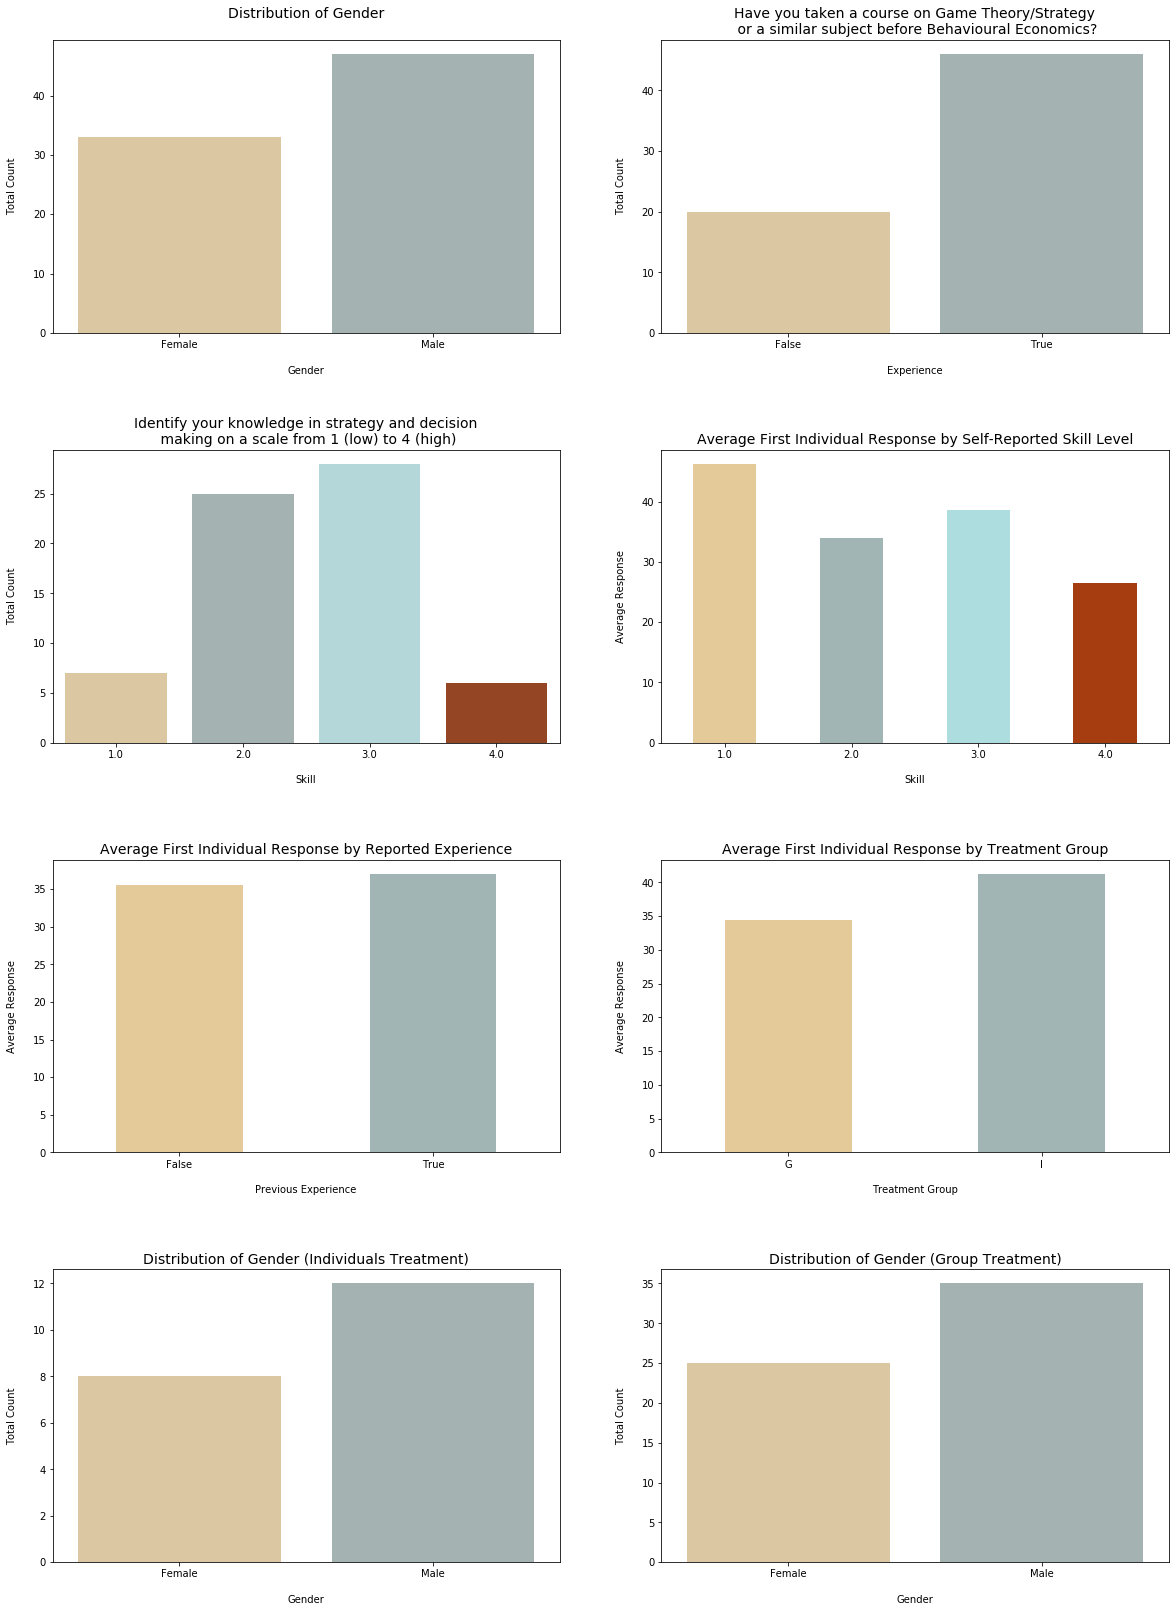

In [15]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(20, 28))

sns.countplot("Gender", data=df, ax=ax1, palette=colors)
ax1.set_title("Distribution of Gender\n", fontsize=14)
ax1.set_xlabel("\nGender")
ax1.set_ylabel("Total Count\n")

sns.countplot("experience", data=df, ax=ax2, palette=colors)
ax2.set_title("Have you taken a course on Game Theory/Strategy\n or a similar subject before Behavioural Economics?", fontsize=14)
ax2.set_xlabel("\nExperience")
ax2.set_ylabel("Total Count\n")

sns.countplot("Skills", data=df, ax=ax3, palette=colors)
ax3.set_title("Identify your knowledge in strategy and decision\n making on a scale from 1 (low) to 4 (high)", fontsize=14)
ax3.set_xlabel("\nSkill")
ax3.set_ylabel("Total Count\n")

df.groupby("Skills")["Individual Answer Stage 1"].mean().plot(kind="bar", ax=ax4, color=colors)
ax4.set_title("Average First Individual Response by Self-Reported Skill Level", fontsize=14)
ax4.set_xlabel("\nSkill")
ax4.set_ylabel("Average Response\n")
ax4.tick_params(labelrotation=0)

df.groupby("experience")["Individual Answer Stage 1"].mean().plot(kind="bar", ax=ax5, color=colors)
ax5.set_title("Average First Individual Response by Reported Experience", fontsize=14)
ax5.set_xlabel("\nPrevious Experience")
ax5.set_ylabel("Average Response\n")
ax5.tick_params(labelrotation=0)

df.groupby("Treatment")["Individual Answer Stage 1"].mean().plot(kind="bar", ax=ax6, color=colors)
ax6.set_title("Average First Individual Response by Treatment Group", fontsize=14)
ax6.set_xlabel("\nTreatment Group")
ax6.set_ylabel("Average Response\n")
ax6.tick_params(labelrotation=0)

sns.countplot("Gender", data=df[df["Treatment"] == "I"].sort_values("Gender"), ax=ax7, palette=colors)
ax7.set_title("Distribution of Gender (Individuals Treatment)", fontsize=14)
ax7.set_xlabel("\nGender")
ax7.set_ylabel("Total Count\n")


sns.countplot("Gender", data=df[df["Treatment"] == "G"].sort_values("Gender"), ax=ax8, palette=colors)
ax8.set_title("Distribution of Gender (Group Treatment)", fontsize=14)
ax8.set_xlabel("\nGender")
ax8.set_ylabel("Total Count\n")


fig.subplots_adjust(hspace=0.4)

plt.show()

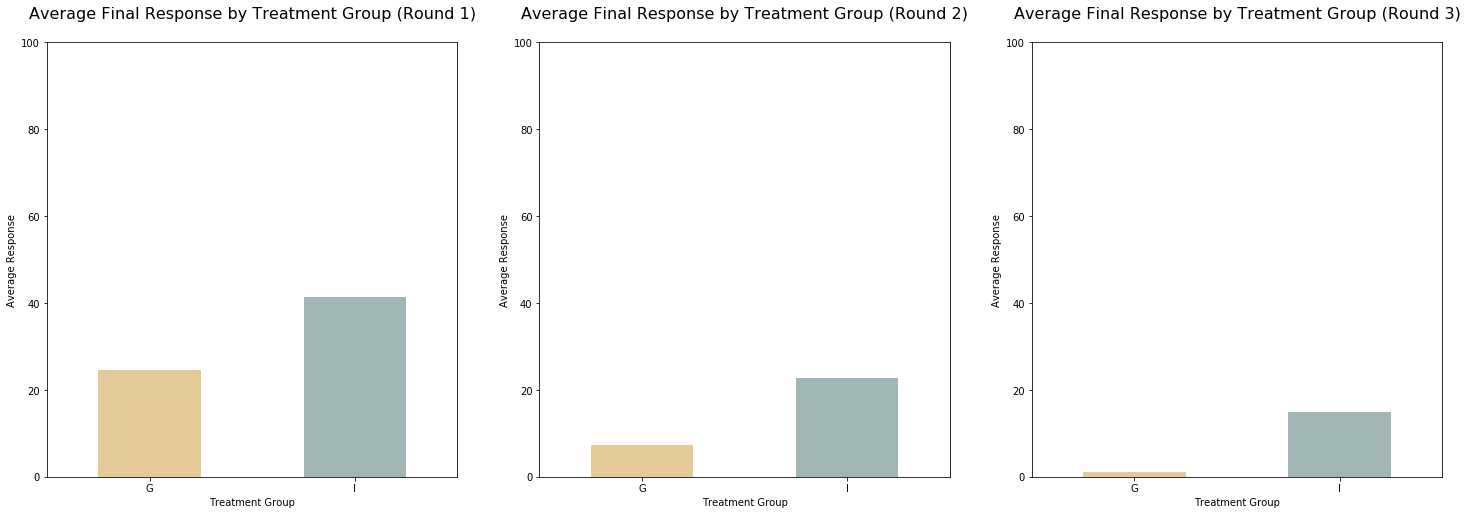

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))

df.groupby("Treatment")["Final Answer Stage 1"].mean().plot(kind="bar", ax=ax1, color=colors, rot=0)

ax1.set_title("Average Final Response by Treatment Group (Round 1)\n", fontsize=16)
ax1.set_xlabel("Treatment Group")
ax1.set_ylabel("Average Response")
ax1.set_ylim(0, 100)


df.groupby("Treatment")["Final Answer Stage 2"].mean().plot(kind="bar", ax=ax2, color=colors, rot=0)

ax2.set_title("Average Final Response by Treatment Group (Round 2)\n", fontsize=16)
ax2.set_xlabel("Treatment Group")
ax2.set_ylabel("Average Response")
ax2.set_ylim(0, 100)


df.groupby("Treatment")["Final Answer Stage 3"].mean().plot(kind="bar", ax=ax3, color=colors, rot=0)

ax3.set_title("Average Final Response by Treatment Group (Round 3)\n", fontsize=16)
ax3.set_xlabel("Treatment Group")
ax3.set_ylabel("Average Response")
ax3.set_ylim(0, 100)


plt.show()

<div style="margin-top: 100px;"></div>

## Data Analysis

### Internal Validity

#### Gender Distribution

Generate a table of proportions and total for gender for each treatment.

In [17]:
genders = df["Gender"].unique()
treatments = df["Treatment"].unique()
gender_proportions = {
    "I": {},
    "G": {}
}
gender_totals = {
    "I": {},
    "G": {}
}

for gender in genders:
    for treatment in treatments:
        total = df[(df["Treatment"] == treatment) & (df["Gender"] == gender)]["ID"].count()
        proportion = total / df[(df["Treatment"] == treatment)]["ID"].count()
        gender_proportions[treatment][gender] = proportion
        gender_totals[treatment][gender] = total


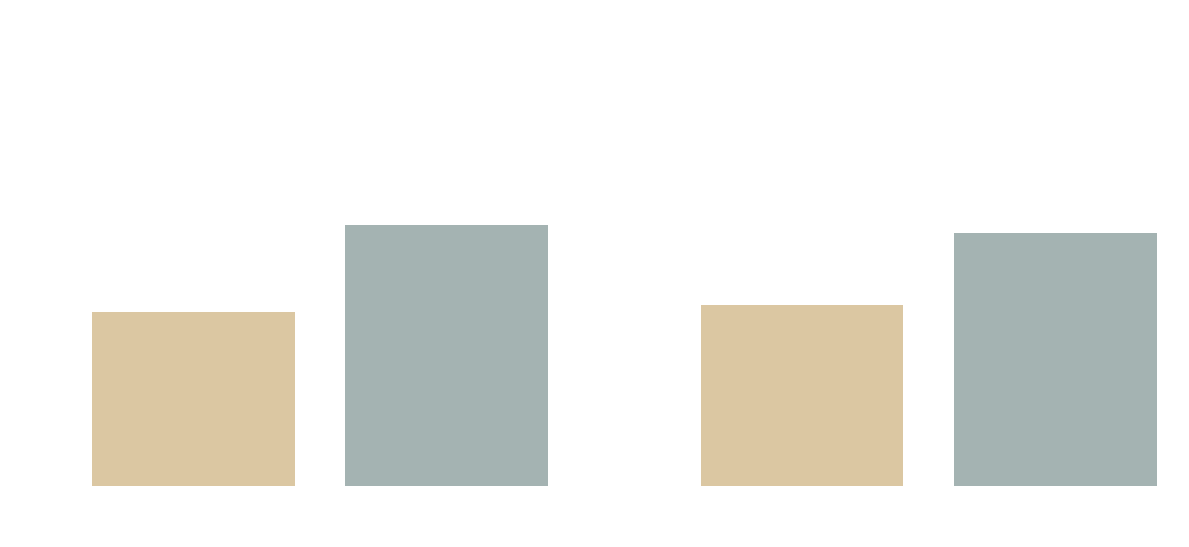

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(["Female", "Male"], list(gender_proportions["I"].values()), ax=ax1, palette=colors)
ax1.set_title("Distribution of Gender (Individuals Treatment)\n", fontsize=22)
ax1.set_xlabel("\nGender", fontsize=16)
ax1.set_ylabel("Proportion\n", fontsize=16)

ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white') 
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.set_ylim(0, 1)


sns.barplot(["Female", "Male"], list(gender_proportions["G"].values()), ax=ax2, palette=colors)
ax2.set_title("Distribution of Gender (Group Treatment)\n", fontsize=22)
ax2.set_xlabel("\nGender", fontsize=16)
ax2.set_ylabel("Proportion\n", fontsize=16)

ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')
ax2.title.set_color('white')
ax2.set_ylim(0, 1)

plt.savefig('gender_distribution_treatments.png', transparent="True")

plt.show()

Test for difference in proportions

In [19]:
gender_proportions

{'I': {'Female': 0.4, 'Male': 0.6},
 'G': {'Female': 0.4166666666666667, 'Male': 0.5833333333333334}}

In [20]:
gender_totals

{'I': {'Female': 8, 'Male': 12}, 'G': {'Female': 25, 'Male': 35}}

In [21]:
yeses_i = gender_totals["I"]["Male"]
totals_i = yeses_i + gender_totals["I"]["Female"]

yeses_g = gender_totals["G"]["Male"]
totals_g = yeses_g + gender_totals["G"]["Female"]

z, p = proportions_ztest([yeses_i, yeses_g], [totals_i, totals_g])
print(f"z-stat: {z}\np-value: {p}")

z-stat: 0.1311228762747762
p-value: 0.8956781047476398


#### Average First Individual Response

Because for the first individual answer in the groups treatment, they didn't discussed with the group yet, it reflects their true intent.

If the difference is not significant, then we can assume the treatments were different.

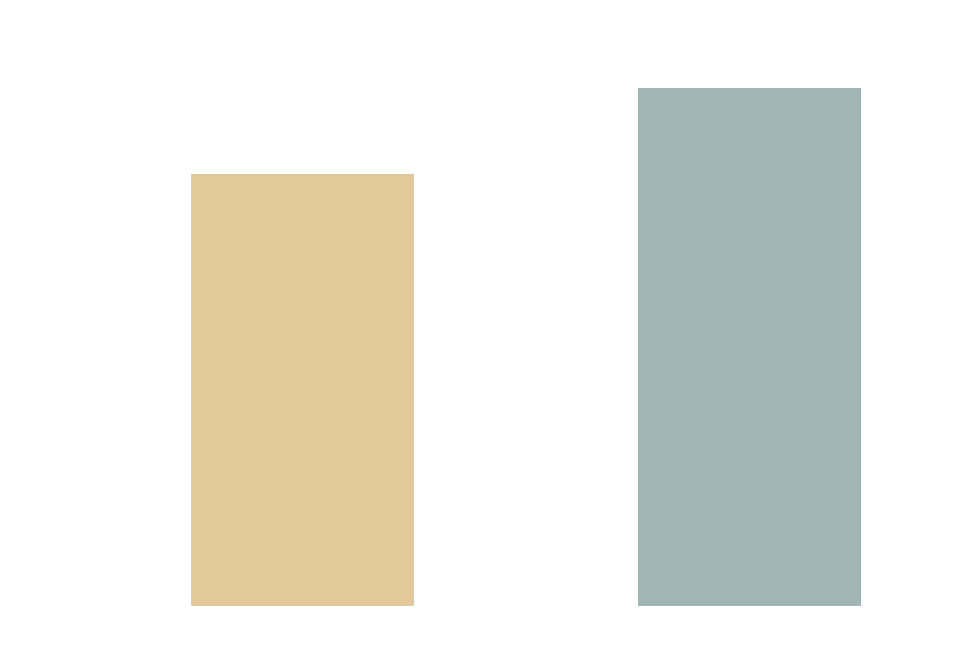

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Treatment")["Individual Answer Stage 1"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average First Individual Response by Treatment Group\n", fontsize=26)
ax.set_xlabel("Treatment Group", fontsize=20)
ax.set_ylabel("Average Response\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_xticklabels(["Groups", "Individuals"])
ax.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('avg_individual_response_round1.png', transparent="True")

plt.show()

Testing the difference in means

In [23]:
y = df[df["Treatment"] == "I"]["Individual Answer Stage 1"].to_list()
x = df[df["Treatment"] == "G"]["Individual Answer Stage 1"].to_list()

In [24]:
t, p = ttest_ind(x, y)

print(f"t-stat: {t}\np-value: {p}")

t-stat: -1.1285209867807153
p-value: 0.2625590736752503


Because the normality approximation of the difference in means is arguable ($N_{\text{Individuals}} = 20 < 30$), we can also do a Mann-Whitney U test

In [25]:
x = df[df["Treatment"] == "G"]["Individual Answer Stage 1"].tolist()
y = df[df["Treatment"] == "I"]["Individual Answer Stage 1"].tolist()

In [26]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 471.5
p-value: 0.07738168081380284


#### Distribution of Experience

We want to understand if the two treatments are similar in terms of experience reported.

In [27]:
not_nas = df.dropna(subset=["Experience"])
experiences = not_nas["Experience"].unique()
treatments = not_nas["Treatment"].unique()
experience_proportions = {
    "I": {},
    "G": {}
}
experience_totals = {
    "I": {},
    "G": {}
}

for experience in experiences:
    for treatment in treatments:
        total = not_nas[(not_nas["Treatment"] == treatment) & (not_nas["Experience"] == experience)]["ID"].count()
        proportion = total / not_nas[(not_nas["Treatment"] == treatment)]["Experience"].count()
        experience_proportions[treatment][experience] = proportion
        experience_totals[treatment][experience] = total


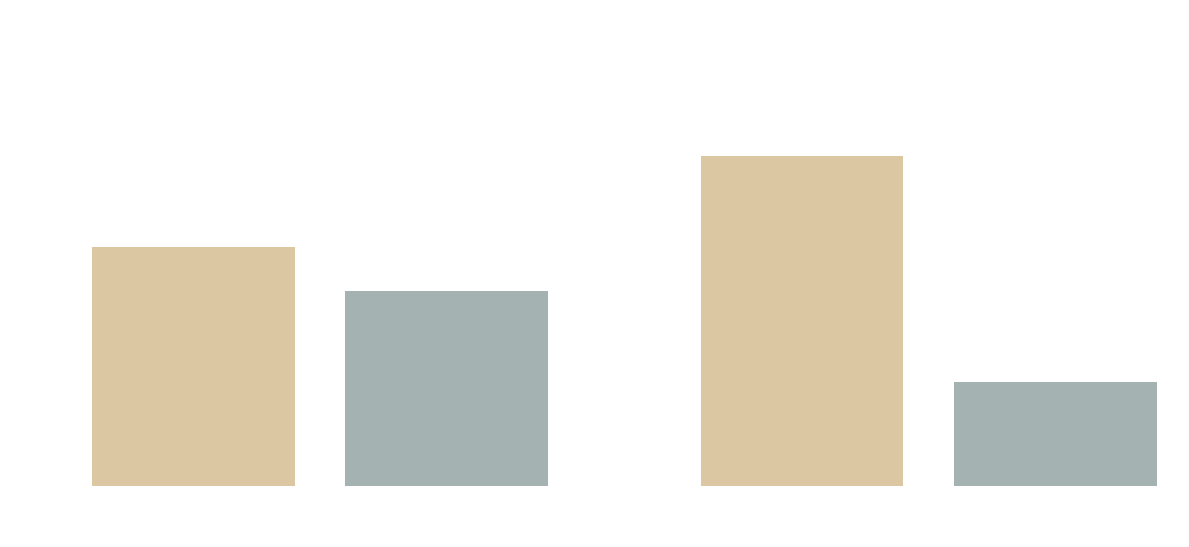

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

exp_ind = list(experience_proportions["I"].values())
sns.barplot(["Yes", "No"], exp_ind, ax=ax1, palette=colors)
ax1.set_title("Distribution of Experience (Individuals Treatment)\n", fontsize=22)
ax1.set_xlabel("\nExperience", fontsize=16)
ax1.set_ylabel("Proportion\n", fontsize=16)

ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white') 
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.set_ylim(0, 1)


exp_ind = list(experience_proportions["G"].values())
sns.barplot(["Yes", "No"], exp_ind, ax=ax2, palette=colors)
ax2.set_title("Distribution of Experience (Group Treatment)\n", fontsize=22)
ax2.set_xlabel("\nExperience", fontsize=16)
ax2.set_ylabel("Proportion\n", fontsize=16)

ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')
ax2.title.set_color('white')
ax2.set_ylim(0, 1)

plt.savefig('experience_distribution_treatments.png', transparent="True")

plt.show()

We can test the difference in proportions

In [29]:
experience_proportions

{'I': {'Yes': 0.55, 'No': 0.45},
 'G': {'Yes': 0.7608695652173914, 'No': 0.2391304347826087}}

In [30]:
experience_totals

{'I': {'Yes': 11, 'No': 9}, 'G': {'Yes': 35, 'No': 11}}

In [31]:
yeses_i = experience_totals["I"]["Yes"]
totals_i = yeses_i + experience_totals["I"]["No"]

yeses_g = experience_totals["G"]["Yes"]
totals_g = yeses_g + experience_totals["G"]["No"]

z, p = proportions_ztest([yeses_i, yeses_g], [totals_i, totals_g])
print(f"z-stat: {z}\np-value: {p}")

z-stat: -1.7131124461949745
p-value: 0.08669185471921562


#### Distribution of Skills

We want to understand if the two treatments are similar in terms of self-reported skills.

In [32]:
not_nas = df.dropna(subset=["Skills"])
skills = not_nas["Skills"].unique()
skills.sort()
treatments = not_nas["Treatment"].unique()
skills_proportions = {
    "I": {},
    "G": {}
}
skills_totals = {
    "I": {},
    "G": {}
}

for skill in skills:
    for treatment in treatments:
        total = not_nas[(not_nas["Treatment"] == treatment) & (not_nas["Skills"] == skill)]["ID"].count()
        proportion = total / not_nas[(not_nas["Treatment"] == treatment)]["Skills"].count()
        skills_proportions[treatment][skill] = proportion
        skills_totals[treatment][skill] = total



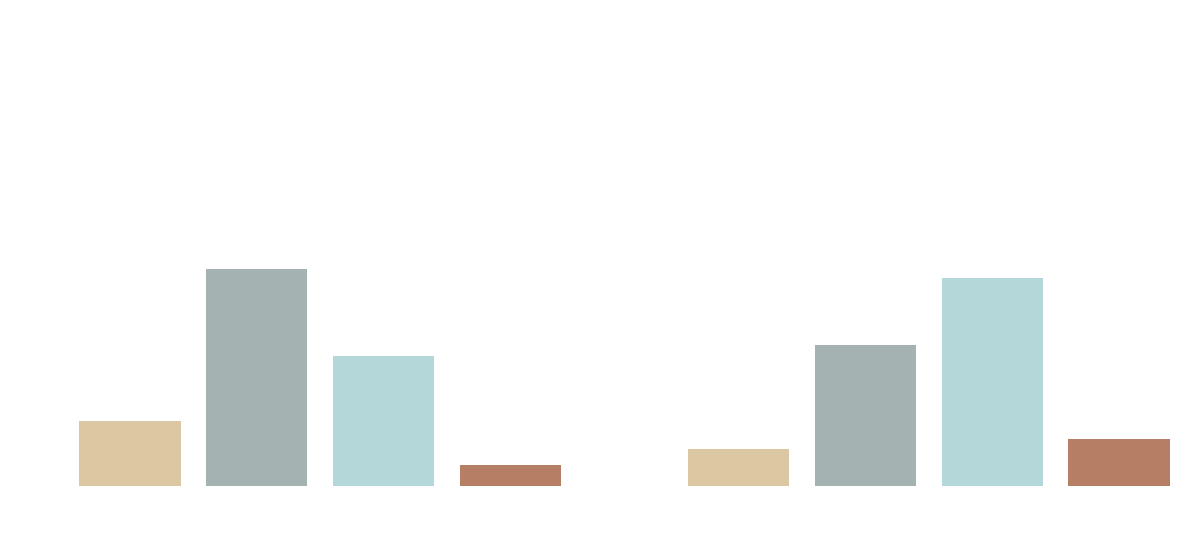

In [33]:
colors[3] = "#c57958"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

skill_ind = list(skills_proportions["I"].values())
sns.barplot(skills, skill_ind, ax=ax1, palette=colors)
ax1.set_title("Distribution of Skills (Individuals Treatment)\n", fontsize=22)
ax1.set_xlabel("\nSkill Level", fontsize=16)
ax1.set_ylabel("Proportion\n", fontsize=16)

ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white') 
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.set_ylim(0, 1)


skill_ind = list(skills_proportions["G"].values())
sns.barplot(skills, skill_ind, ax=ax2, palette=colors)
ax2.set_title("Distribution of Skills (Group Treatment)\n", fontsize=22)
ax2.set_xlabel("\nSkill Level", fontsize=16)
ax2.set_ylabel("Proportion\n", fontsize=16)

ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')
ax2.title.set_color('white')
ax2.set_ylim(0, 1)

plt.savefig('skill_distribution_treatments.png', transparent="True")

plt.show()

We can test the difference in proportions with a 𝜒² contingency table

In [34]:
print(skills_proportions)

{'I': {1.0: 0.15, 2.0: 0.5, 3.0: 0.3, 4.0: 0.05}, 'G': {1.0: 0.08695652173913043, 2.0: 0.32608695652173914, 3.0: 0.4782608695652174, 4.0: 0.10869565217391304}}


In [35]:
print(skills_totals)

{'I': {1.0: 3, 2.0: 10, 3.0: 6, 4.0: 1}, 'G': {1.0: 4, 2.0: 15, 3.0: 22, 4.0: 5}}


In [36]:
contingency_table = []
for treatment in skills_totals:
    counts = []
    for level in skills_totals[treatment]:
        counts.append(skills_totals[treatment][level])
    contingency_table.append(counts)

contingency_table

[[3, 10, 6, 1], [4, 15, 22, 5]]

In [37]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"𝜒²-stat: {chi2}\np-value: {p}\ndf: {dof}")

𝜒²-stat: 3.207763975155279
p-value: 0.36068785972175865
df: 3


## Histogram of Results

Create bins for histogram, get the number of responses for the round in each bin (in groups only get one per group).

**Round 1**

In [38]:
bins = 10

results_groups = []
results_individuals = []
labels = []

for i in range(0, 101, bins):
    lower_bound = i
    upper_bound = i+bins-1
    label = f"{lower_bound} to {upper_bound}"
    labels.append(label)
    groups_count = df[(df["Treatment"] == "G") & (df["Final Answer Stage 1"] >= lower_bound) & (df["Final Answer Stage 1"] <= upper_bound)]["ID"].count()/3
    individual_count = df[(df["Treatment"] == "I") & (df["Final Answer Stage 1"] >= lower_bound) & (df["Final Answer Stage 1"] <= upper_bound)]["ID"].count()
    results_groups.append(groups_count)
    results_individuals.append(individual_count)

labels[-1] = "100"

merged_data = []
for i in range(len(labels)):
    data = [labels[i], results_individuals[i], results_groups[i]]
    merged_data.append(data)

histogram_df = pd.DataFrame(merged_data, columns=["Interval", "Individuals", "Groups"])
histogram_df = histogram_df.melt(value_vars=["Individuals", "Groups"], id_vars=["Interval"])

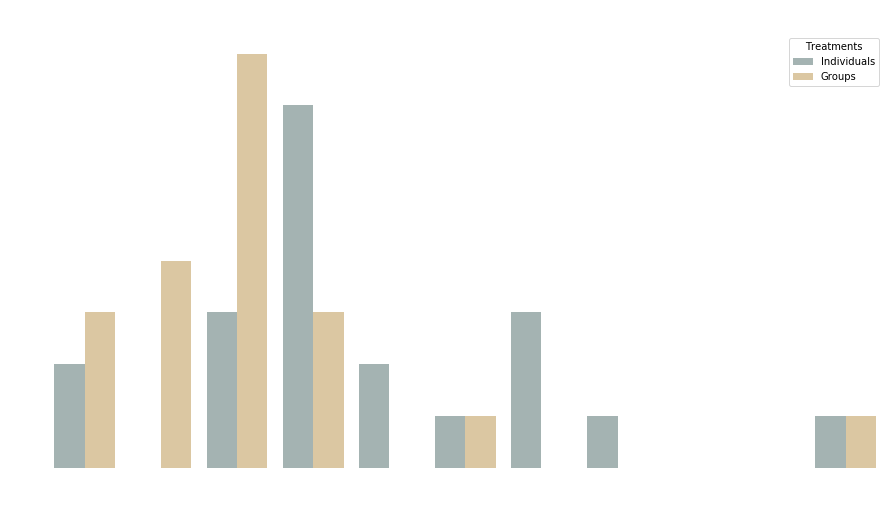

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.barplot(x="Interval", y='value', hue='variable', data=histogram_df, ax=ax, palette=[colors[1], colors[0]])

plt.legend(["Groups", "Individuals"])

ax.set_title("Histogram of Answers (Stage 1)", fontsize=26)
ax.set_xlabel("Responses", fontsize=20)
ax.set_ylabel("Total Count", fontsize=20)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=15)

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["Individuals", "Groups"], title="Treatments")

plt.savefig('histogram_answers_stage1.png', transparent="True", pad_inches=0.2, bbox_inches='tight')

plt.show()



**Round 2**

In [40]:
bins = 10

results_groups = []
results_individuals = []
labels = []

for i in range(0, 101, bins):
    lower_bound = i
    upper_bound = i+bins-1
    label = f"{lower_bound} to {upper_bound}"
    labels.append(label)
    groups_count = df[(df["Treatment"] == "G") & (df["Final Answer Stage 2"] >= lower_bound) & (df["Final Answer Stage 2"] <= upper_bound)]["ID"].count()/3
    individual_count = df[(df["Treatment"] == "I") & (df["Final Answer Stage 2"] >= lower_bound) & (df["Final Answer Stage 2"] <= upper_bound)]["ID"].count()
    results_groups.append(groups_count)
    results_individuals.append(individual_count)

labels[-1] = "100"

merged_data = []
for i in range(len(labels)):
    data = [labels[i], results_individuals[i], results_groups[i]]
    merged_data.append(data)

histogram_df = pd.DataFrame(merged_data, columns=["Interval", "Individuals", "Groups"])
histogram_df = histogram_df.melt(value_vars=["Individuals", "Groups"], id_vars=["Interval"])

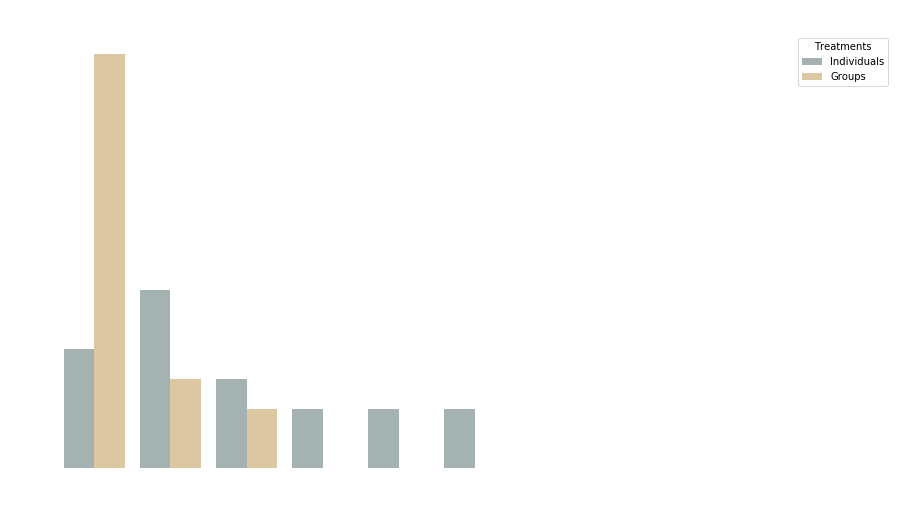

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.barplot(x="Interval", y='value', hue='variable', data=histogram_df, ax=ax, palette=[colors[1], colors[0]])

plt.legend(["Groups", "Individuals"])

ax.set_title("Histogram of Answers (Stage 2)", fontsize=26)
ax.set_xlabel("Responses", fontsize=20)
ax.set_ylabel("Total Count", fontsize=20)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=15)

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["Individuals", "Groups"], title="Treatments")

plt.savefig('histogram_answers_stage2.png', transparent="True", pad_inches=0.2, bbox_inches='tight')

plt.show()



**Round 3**

In [42]:
bins = 10

results_groups = []
results_individuals = []
labels = []

for i in range(0, 101, bins):
    lower_bound = i
    upper_bound = i+bins-1
    label = f"{lower_bound} to {upper_bound}"
    labels.append(label)
    groups_count = df[(df["Treatment"] == "G") & (df["Final Answer Stage 3"] >= lower_bound) & (df["Final Answer Stage 3"] <= upper_bound)]["ID"].count()/3
    individual_count = df[(df["Treatment"] == "I") & (df["Final Answer Stage 3"] >= lower_bound) & (df["Final Answer Stage 3"] <= upper_bound)]["ID"].count()
    results_groups.append(groups_count)
    results_individuals.append(individual_count)

labels[-1] = "100"

merged_data = []
for i in range(len(labels)):
    data = [labels[i], results_individuals[i], results_groups[i]]
    merged_data.append(data)

histogram_df = pd.DataFrame(merged_data, columns=["Interval", "Individuals", "Groups"])
histogram_df = histogram_df.melt(value_vars=["Individuals", "Groups"], id_vars=["Interval"])

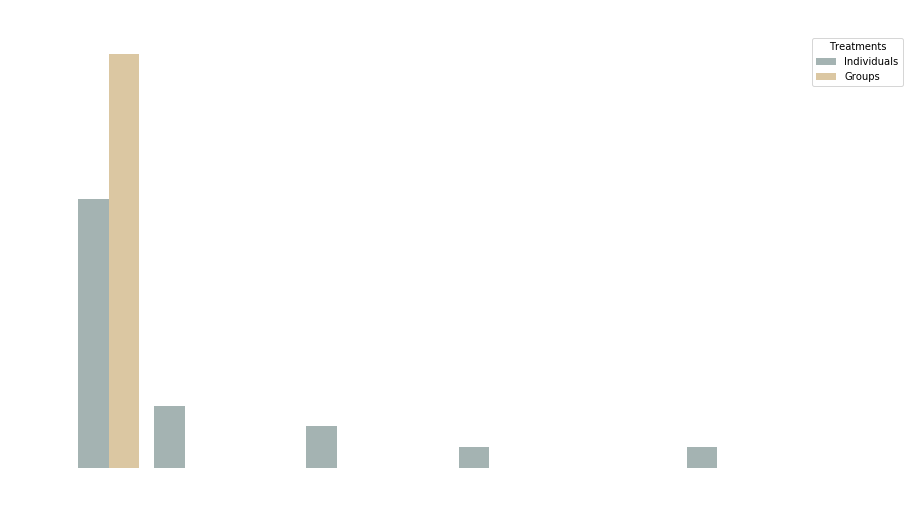

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.barplot(x="Interval", y='value', hue='variable', data=histogram_df, ax=ax, palette=[colors[1], colors[0]])

plt.legend(["Groups", "Individuals"])

ax.set_title("Histogram of Answers (Stage 3)", fontsize=26)
ax.set_xlabel("Responses", fontsize=20)
ax.set_ylabel("Total Count", fontsize=20)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=15)

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["Individuals", "Groups"], title="Treatments")

plt.savefig('histogram_answers_stage3.png', transparent="True", pad_inches=0.2, bbox_inches='tight')

plt.show()


**Round 1**

Test if responses for each round were different for each treatment

In [44]:
sub_df = df[df["Treatment"] == "G"]
seats = sub_df["Seat"].unique().tolist()

x = []

for seat in seats:
    group_ans = sub_df[sub_df["Seat"] == seat]["Final Answer Stage 1"].to_list()[0]
    x.append(group_ans)

y = df[df["Treatment"] == "I"]["Final Answer Stage 1"].to_list()

In [45]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 90.5
p-value: 0.0015818476253053298


Test if responses for each treatment where different from zero

In [46]:
zeros = np.zeros(20).tolist()
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 90.5
p-value: 0.0015818476253053298


In [47]:
zeros = np.zeros(20).tolist()
u, p = mannwhitneyu(y, zeros)
print(f"W-stat: {u}\np-value: {p}")

W-stat: 10.0
p-value: 1.4908061610982427e-08


Using t-test

In [48]:
t, p = ttest_1samp(x, 0)
print(f"t-stat: {t}\np-value: {p}")

t-stat: 5.09022425154778
p-value: 6.50177057442766e-05


In [49]:
t, p = ttest_1samp(y, 0)
print(f"t-stat: {t}\np-value: {p}")

t-stat: 7.662755609813169
p-value: 3.1583896201885087e-07


**Round 2**

In [50]:
sub_df = df[df["Treatment"] == "G"]
seats = sub_df["Seat"].unique().tolist()

x = []

for seat in seats:
    group_ans = sub_df[sub_df["Seat"] == seat]["Final Answer Stage 2"].to_list()[0]
    x.append(group_ans)

In [51]:
y = df[df["Treatment"] == "I"]["Final Answer Stage 2"].to_list()

In [52]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 76.0
p-value: 0.0004031811106233999


Test if responses for each treatment where different from zero

In [53]:
zeros = np.zeros(20).tolist()
u, p = mannwhitneyu(x, zeros)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 50.0
p-value: 1.6515114075603853e-06


In [54]:
zeros = np.zeros(20).tolist()
u, p = mannwhitneyu(y, zeros)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 20.0
p-value: 5.259344238138618e-08


Using t-test

In [55]:
t, p = ttest_1samp(x, 0)
print(f"t-stat: {t}\np-value: {p}")

t-stat: 4.015973489349137
p-value: 0.0007387400418842687


In [56]:
t, p = ttest_1samp(y, 0)
print(f"t-stat: {t}\np-value: {p}")

t-stat: 6.446034751724916
p-value: 3.528341799294264e-06


**Round 3**

In [57]:
sub_df = df[df["Treatment"] == "G"]
seats = sub_df["Seat"].unique().tolist()

x = []

for seat in seats:
    group_ans = sub_df[sub_df["Seat"] == seat]["Final Answer Stage 3"].to_list()[0]
    x.append(group_ans)

y = df[df["Treatment"] == "I"]["Final Answer Stage 3"].to_list()

In [58]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 59.0
p-value: 6.35211685174059e-05


Test if responses for each treatment where different from zero

In [59]:
zeros = np.zeros(20).tolist()
u, p = mannwhitneyu(x, zeros)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 70.0
p-value: 1.2764813288999263e-05


In [60]:
zeros = np.zeros(20).tolist()
u, p = mannwhitneyu(y, zeros)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 30.0
p-value: 1.739148920693556e-07


Using t-test

In [61]:
t, p = ttest_1samp(x, 0)
print(f"t-stat: {t}\np-value: {p}")

t-stat: 3.6497748991723467
p-value: 0.0017040073798565384


In [62]:
t, p = ttest_1samp(y, 0)
print(f"t-stat: {t}\np-value: {p}")

t-stat: 3.2343043454825717
p-value: 0.004364951935981083


### Evolution of the Average Response

We want to understand how the average response changed over time (over each round)

In [63]:
means_groups = []
means_individuals = []
labels = []

for i in range(1, 4):
    label = f"Round {i}"
    labels.append(label)
    means = df.groupby("Treatment")[f"Final Answer Stage {i}"].mean()
    means_groups.append(means["G"])
    means_individuals.append(means["I"])


merged_means = []
for i in range(len(labels)):
    data = [labels[i], means_individuals[i], means_groups[i]]
    merged_means.append(data)

means_df = pd.DataFrame(merged_means, columns=["Round", "Individuals", "Groups"])
means_df = means_df.melt(value_vars=["Individuals", "Groups"], id_vars=["Round"])

In [64]:
means_df

,Round,variable,value
0,Round 1,Individuals,41.28315
1,Round 2,Individuals,22.74000
2,Round 3,Individuals,14.95070
3,Round 1,Groups,24.58000
4,Round 2,Groups,7.40750
5,Round 3,Groups,1.06950


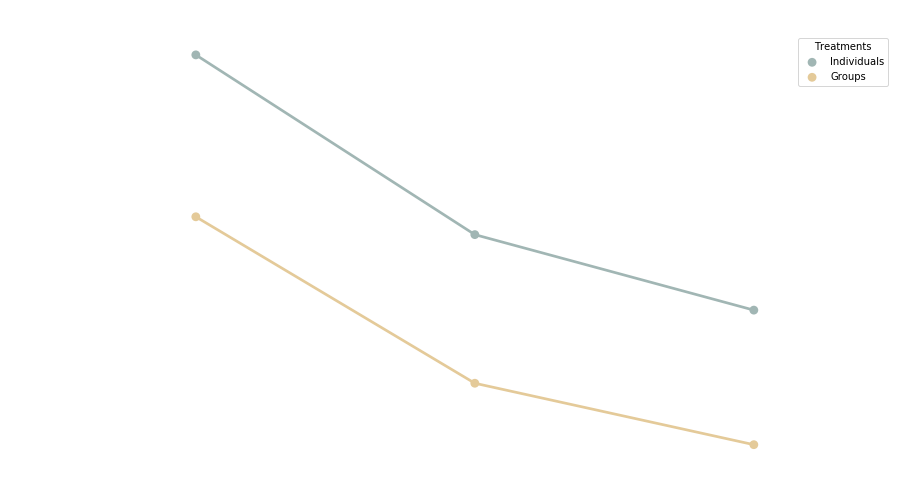

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.pointplot(x="Round", y='value', hue='variable', data=means_df, ax=ax, palette=[colors[1], colors[0]])

plt.legend(["Groups", "Individuals"])

ax.set_title("Evolution of Mean Response", fontsize=26)
ax.set_xlabel("", fontsize=20)
ax.set_ylabel("Average Response", fontsize=20)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=15)

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["Individuals", "Groups"], title="Treatments")

plt.savefig('means_progression.png', transparent="True", pad_inches=0.2, bbox_inches='tight')

plt.show()







### Distance to Target

In the following lines, we calculate the individual's (for both treatments) distance to the target. To do so, we first calculate the target for each treatment, for each market, for each round. This target is, as defined for this experiment, the average of the submissions for the market multiplied by $p=\frac{2}{3}$

In [66]:
results = {}
rounds = 3

treatments = df["Treatment"].unique().tolist()
for treatment in treatments:
    results[treatment] = {}
    treat_df = df[df["Treatment"] == treatment]
    markets = treat_df["Market"].unique().tolist()
    for market in markets:
        for i in range(1, rounds+1):
            target = treat_df[treat_df["Market"] == market][f"Final Answer Stage {i}"].mean() * 2/3
            results[treatment][market] = target
            df.loc[(df["Treatment"] == treatment) & (df["Market"] == market), f"Target Stage {i}"] = target

for i in range(1, rounds+1):
    df[f"Individual Distance Target Stage {i}"] = abs(df[f"Individual Answer Stage {i}"] - df[f"Target Stage {i}"])

### Distance to Target vs. Experience

#### Round 1

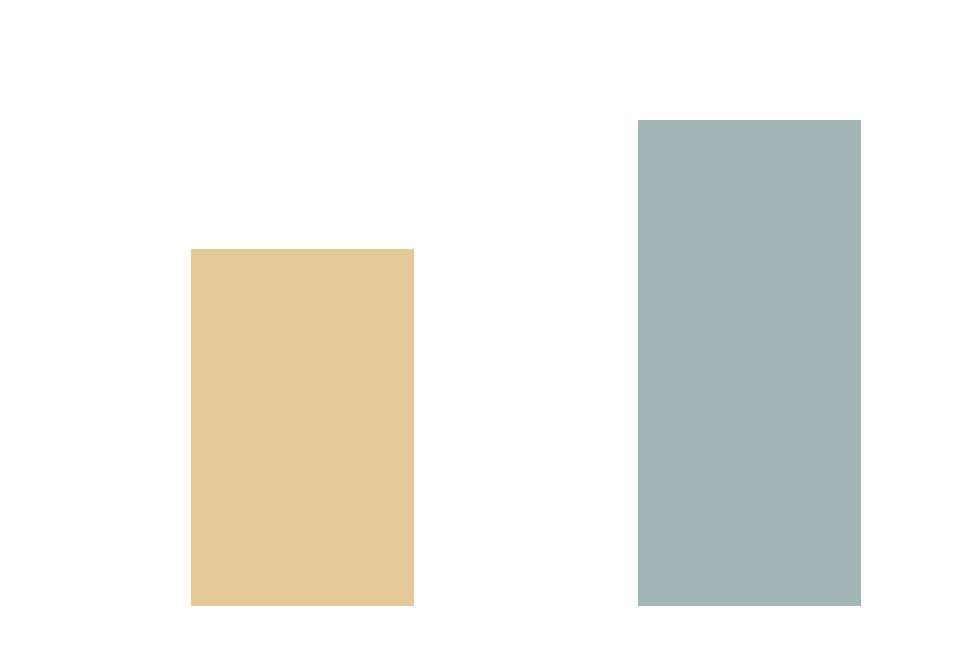

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Experience")["Individual Distance Target Stage 1"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average Distance to Target by Experience (Stage 1)\n", fontsize=26)
ax.set_xlabel("Experience", fontsize=20)
ax.set_ylabel("Average Distance to Target\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 25)

plt.savefig('avg_distance_experience_stage1.png', transparent="True")

plt.show()

In [68]:
x = df[df["Experience"] == "Yes"]["Individual Distance Target Stage 1"].to_list()
y = df[df["Experience"] == "No"]["Individual Distance Target Stage 1"].to_list()

In [69]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 412.5
p-value: 0.25597672273758715


#### Round 2

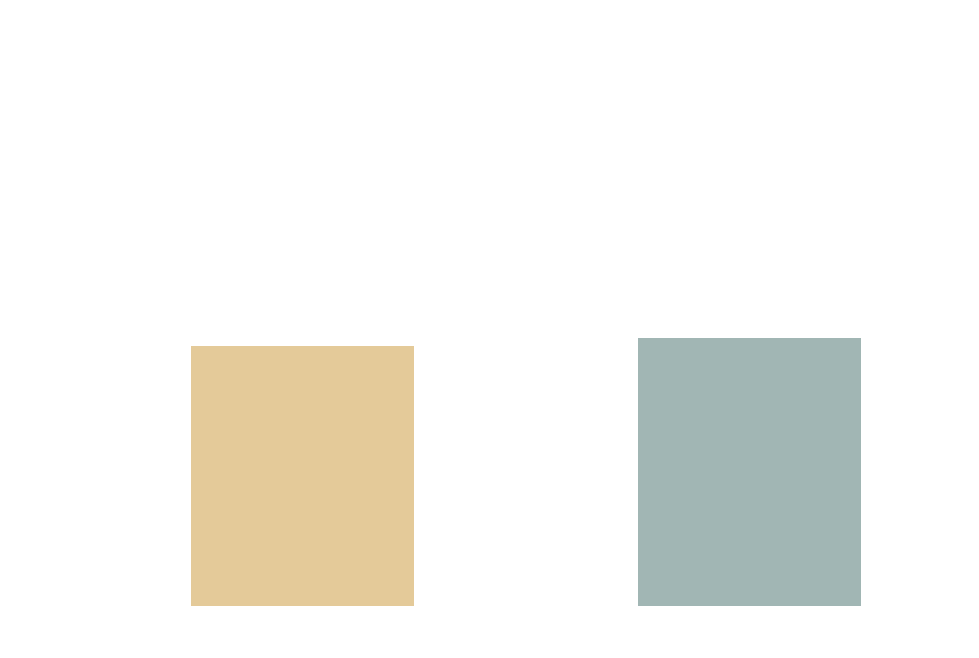

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Experience")["Individual Distance Target Stage 2"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average Distance to Target by Experience (Stage 2)\n", fontsize=26)
ax.set_xlabel("Experience", fontsize=20)
ax.set_ylabel("Average Distance to Target\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 25)

plt.savefig('avg_distance_experience_stage2.png', transparent="True")

plt.show()

In [71]:
x = df[df["Experience"] == "Yes"]["Individual Distance Target Stage 2"].to_list()
y = df[df["Experience"] == "No"]["Individual Distance Target Stage 2"].to_list()

In [72]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 415.5
p-value: 0.2695407875572563


#### Round 3

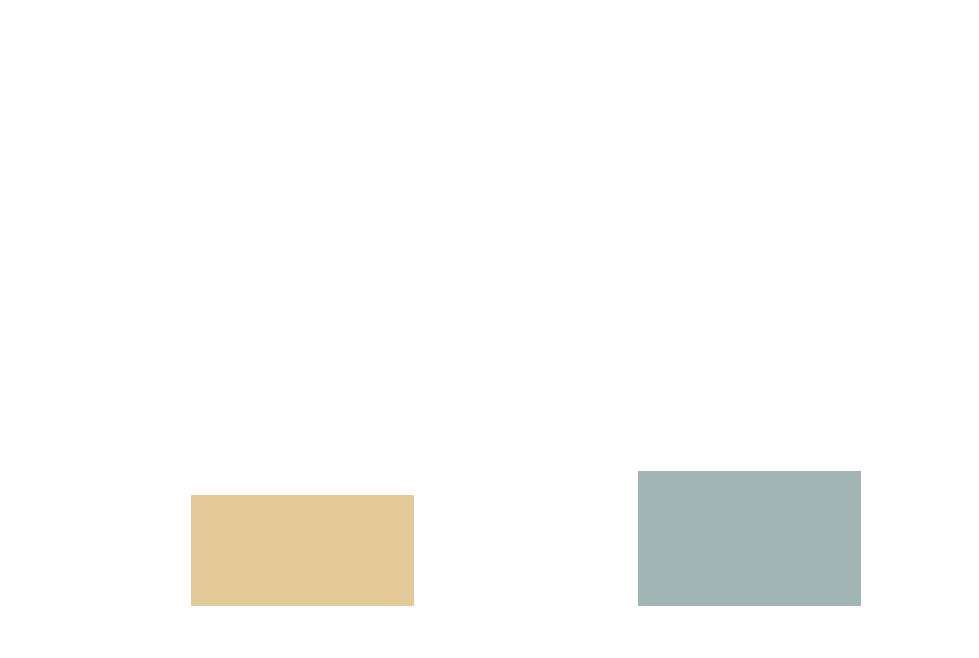

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Experience")["Individual Distance Target Stage 3"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average Distance to Target by Experience (Stage 3)\n", fontsize=26)
ax.set_xlabel("Experience", fontsize=20)
ax.set_ylabel("Average Distance to Target\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 25)

plt.savefig('avg_distance_experience_stage3.png', transparent="True")

plt.show()

In [74]:
x = df[df["Experience"] == "Yes"]["Individual Distance Target Stage 3"].to_list()
y = df[df["Experience"] == "No"]["Individual Distance Target Stage 3"].to_list()

In [75]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 427.0
p-value: 0.32479648840939274


### Distance to Target vs. Skill Level

#### Round 1

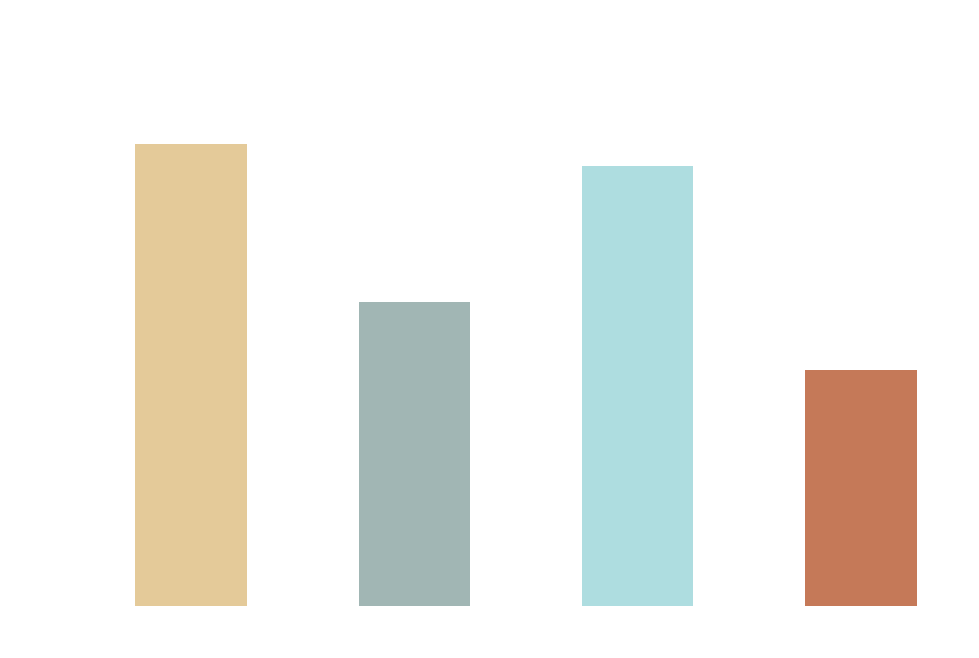

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Skills")["Individual Distance Target Stage 1"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average Distance to Target by Skill Level (Stage 1)\n", fontsize=26)
ax.set_xlabel("Skill Level", fontsize=20)
ax.set_ylabel("Average Distance to Target\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 30)

plt.savefig('avg_distance_skills_stage1.png', transparent="True")

plt.show()

#### Round 2

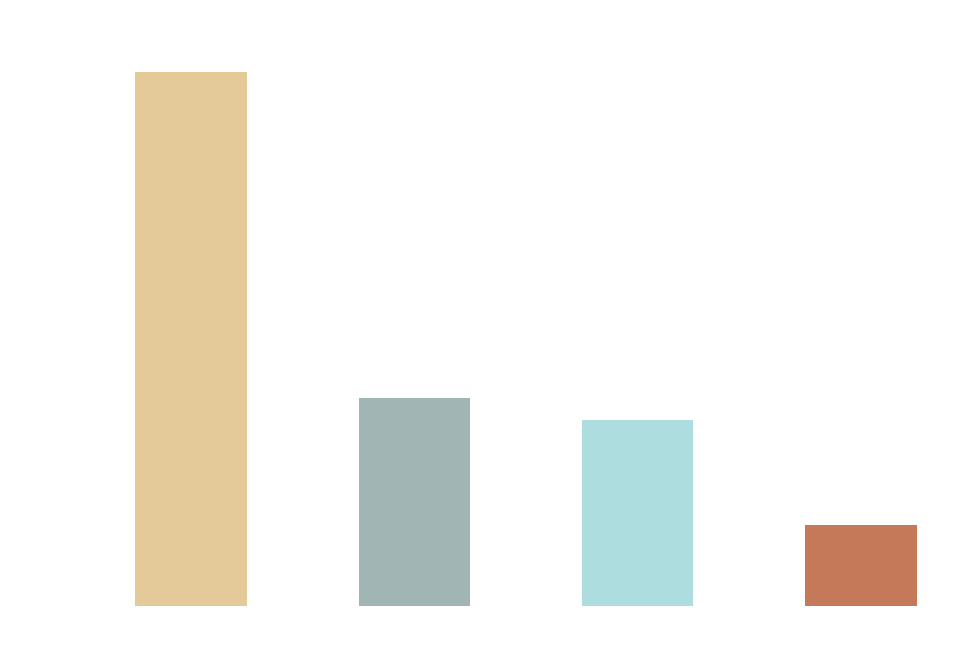

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Skills")["Individual Distance Target Stage 2"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average Distance to Target by Skill Level (Stage 2)\n", fontsize=26)
ax.set_xlabel("Skill Level", fontsize=20)
ax.set_ylabel("Average Distance to Target\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 30)

plt.savefig('avg_distance_skills_stage2.png', transparent="True")

plt.show()

#### Round 3

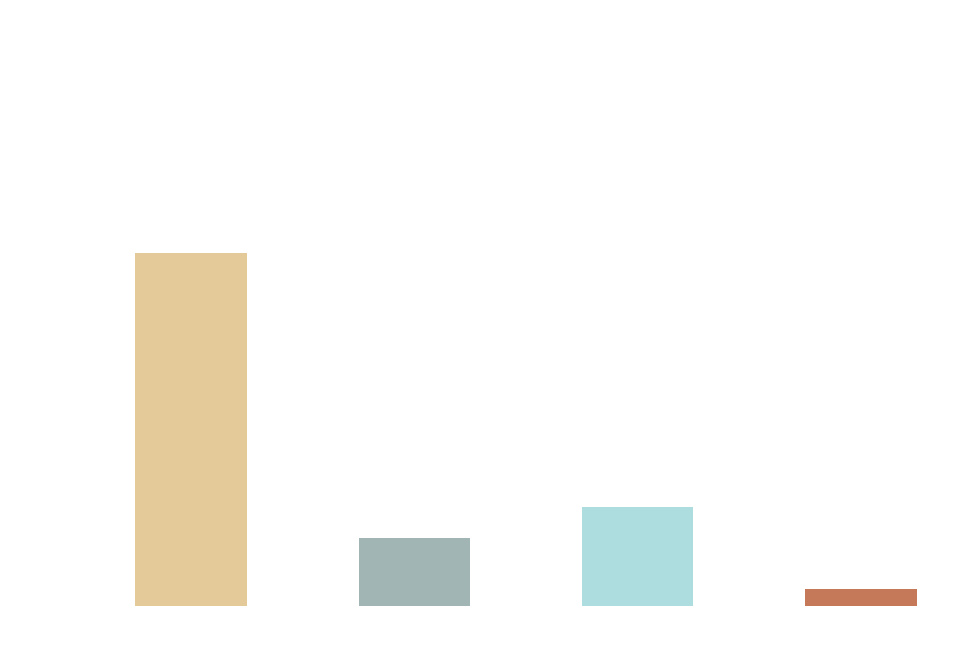

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("Skills")["Individual Distance Target Stage 3"].mean().plot(kind="bar", ax=ax, color=colors)

ax.set_title("Average Distance to Target by Skill Level (Stage 3)\n", fontsize=26)
ax.set_xlabel("Skill Level", fontsize=20)
ax.set_ylabel("Average Distance to Target\n", fontsize=20)
plt.xticks(rotation=0)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 30)

plt.savefig('avg_distance_skills_stage3.png', transparent="True")

plt.show()

#### Round 1

**Skill 1 vs. Skill 4**

In [79]:
x = df[df["Skills"] == 1]["Individual Distance Target Stage 1"]
y = df[df["Skills"] == 4]["Individual Distance Target Stage 1"]

In [80]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 10.0
p-value: 0.06680720126885807


**Skill 3 vs. Skill 4**

In [81]:
x = df[df["Skills"] == 3]["Individual Distance Target Stage 1"]
y = df[df["Skills"] == 4]["Individual Distance Target Stage 1"]

In [82]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 63.0
p-value: 0.1771797667256096


#### Round 2

**Skill 1 vs. Skill 4**

In [83]:
x = df[df["Skills"] == 1]["Individual Distance Target Stage 2"]
y = df[df["Skills"] == 4]["Individual Distance Target Stage 2"]

In [84]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 7.0
p-value: 0.02689204443119914


**Skill 3 vs. Skill 4**

In [85]:
x = df[df["Skills"] == 3]["Individual Distance Target Stage 2"]
y = df[df["Skills"] == 4]["Individual Distance Target Stage 2"]

In [86]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 41.0
p-value: 0.02729292840289088


#### Round 3

**Skill 1 vs. Skill 4**

In [87]:
x = df[df["Skills"] == 1]["Individual Distance Target Stage 3"]
y = df[df["Skills"] == 4]["Individual Distance Target Stage 3"]

In [88]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 13.0
p-value: 0.14132525106865657


**Skill 3 vs. Skill 4**

In [89]:
x = df[df["Skills"] == 3]["Individual Distance Target Stage 3"]
y = df[df["Skills"] == 4]["Individual Distance Target Stage 3"]

In [90]:
u, p = mannwhitneyu(x, y)
print(f"U-stat: {u}\np-value: {p}")

U-stat: 64.5
p-value: 0.19464620647497732


### Distance to Target (Final Answer)

Previously, we took a look at individual answer and its distance to the target. Here we will calculate the distance to target using the final answer (group decision for the groups treatment)

In [91]:
rounds = 3
for i in range(1, rounds+1):
    df[f"Final Distance Target Stage {i}"] = abs(df[f"Final Answer Stage {i}"] - df[f"Target Stage {i}"])


cols = []
rounds = 3
for i in range(1, rounds+1):
    cols.append(f"Final Answer Stage {i}")
    cols.append(f"Target Stage {i}")
    cols.append(f"Final Distance Target Stage {i}")
    
df[cols].head()

,Final Answer Stage 1,Target Stage 1,Final Distance Target Stage 1,Final Answer Stage 2,Target Stage 2,Final Distance Target Stage 2,Final Answer Stage 3,Target Stage 3,Final Distance Target Stage 3
0,37.0,13.146667,23.853333,26.0,6.146667,19.853333,2.00,1.350667,0.649333
1,37.0,13.146667,23.853333,26.0,6.146667,19.853333,2.00,1.350667,0.649333
2,37.0,13.146667,23.853333,26.0,6.146667,19.853333,2.00,1.350667,0.649333
3,22.0,11.906667,10.093333,3.0,2.493333,0.506667,0.67,0.236000,0.434000
4,22.0,11.906667,10.093333,3.0,2.493333,0.506667,0.67,0.236000,0.434000


### Final Distance to Target by Treatment

In [92]:
means_groups = []
means_individuals = []
labels = []

for i in range(1, 4):
    label = f"Round {i}"
    labels.append(label)
    means = df.groupby("Treatment")[f"Final Distance Target Stage {i}"].mean()
    means_groups.append(means["G"])
    means_individuals.append(means["I"])


merged_means = []
for i in range(len(labels)):
    data = [labels[i], means_individuals[i], means_groups[i]]
    merged_means.append(data)

distance_df = pd.DataFrame(merged_means, columns=["Round", "Individuals", "Groups"])
distance_df = distance_df.melt(value_vars=["Individuals", "Groups"], id_vars=["Round"])

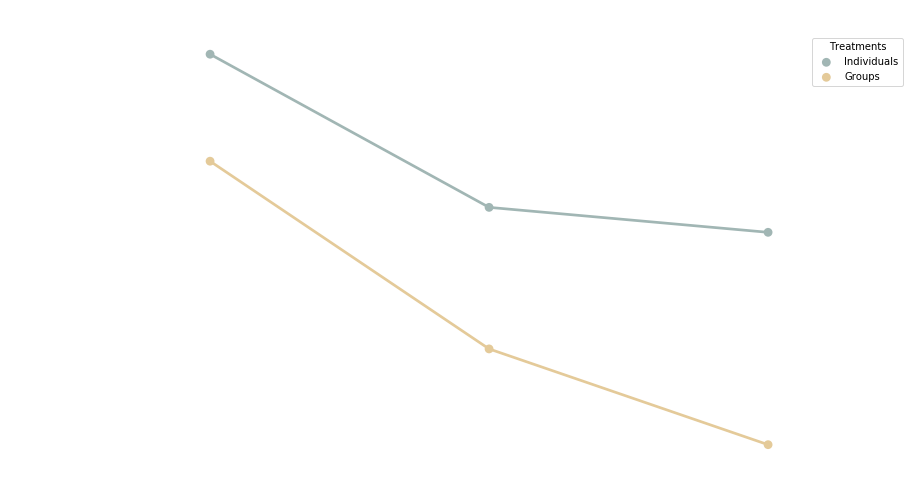

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.pointplot(x="Round", y='value', hue='variable', data=distance_df, ax=ax, palette=[colors[1], colors[0]])

plt.legend(["Groups", "Individuals"])

ax.set_title("Evolution of Mean Distance to Target", fontsize=26)
ax.set_xlabel("", fontsize=20)
ax.set_ylabel("Average Distance to Target", fontsize=20)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='both', which='major', labelsize=15)

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["Individuals", "Groups"], title="Treatments")

plt.savefig('mean_distacne_target_progression.png', transparent="True", pad_inches=0.2, bbox_inches='tight')

plt.show()

